In [67]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb 
import plotly.express as px
import plotly.graph_objects as go
from textwrap import wrap
from scipy.io import arff

In [45]:
balance_data = arff.loadarff('covidbalance.arff')
balancedata = pd.DataFrame(balance_data[0])
balancedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   6202 non-null   float64
 1   SARS-Cov-2 exam result                                 6202 non-null   object 
 2   Patient addmited to regular ward (1=yes, 0=no)         6202 non-null   float64
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  6202 non-null   float64
 4   Patient addmited to intensive care unit (1=yes, 0=no)  6202 non-null   float64
 5   Hematocrit                                             6202 non-null   float64
 6   Hemoglobin                                             6202 non-null   float64
 7   Platelets                                              6202 non-null   float64
 8   Mean platelet volume                            

In [10]:
balancedata

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13.0,b'negative',0.0,0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'?'
1,17.0,b'negative',0.0,0.000000,0.0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'negative'
2,8.0,b'negative',0.0,0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'?'
3,5.0,b'negative',0.0,0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'?'
4,15.0,b'negative',0.0,0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'?'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,16.0,b'positive',0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'negative'
6198,4.0,b'positive',0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'negative'
6199,15.0,b'positive',0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'negative'
6200,3.0,b'positive',0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'not_detected',b'negative',b'negative'


In [46]:
whiteBloodCell = ['Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']

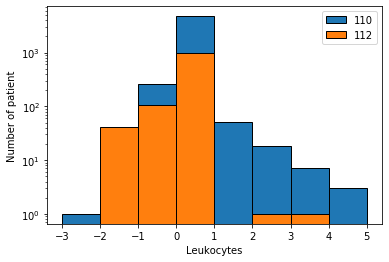

In [52]:
groups = balancedata.groupby("SARS-Cov-2 exam result")
bins =[-3,-2,-1,0,1,2,3,4,5]
for name,group in groups :
    plt.hist(group["Leukocytes"],bins=bins,edgecolor='black',log=True ,label=name)
    
plt.xlabel("Leukocytes")
plt.ylabel("Number of patient")
plt.legend()

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0       b'negative'
1       b'negative'
2       b'negative'
3       b'negative'
4       b'negative'
           ...     
6197    b'positive'
6198    b'positive'
6199    b'positive'
6200    b'positive'
6201    b'positive'
Name: SARS-Cov-2 exam result, Length: 6202, dtype: object.

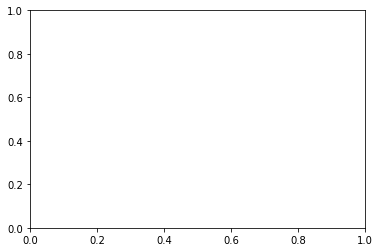

In [66]:
attribut_1 = balancedata['SARS-Cov-2 exam result'] 
attribut_2 = balancedata['Lymphocytes']
attribut_3 = balancedata['Leukocytes']
attribut_4 = balancedata['Basophils']


plt.scatter(attribut_1, attribut_2 , c=attribut_3 , cmap='summer',
  edgecolor='black', linewidth=1,alpha=0.75) 

#data_result = balancedata[['SARS-Cov-2 exam result']]
#data_result = data_result.replace(b'negative', -1)
#data_result = data_result.replace(b'positive', 1)
#plt.scatter(data_result, attribut_2 , c=attribut_3 , cmap='summer',
  #edgecolor='black', linewidth=1,alpha=0.75) 
    
cbar =plt.colorbar()
cbar.set_label('Leukocytes')
#plt.xscale('log')  
#plt.yscale('log') 

plt.title('Name')
plt.xlabel('SARS-Cov-2 exam result')
plt.ylabel('Lymphocytes')

plt.tight_layout()
plt.show()

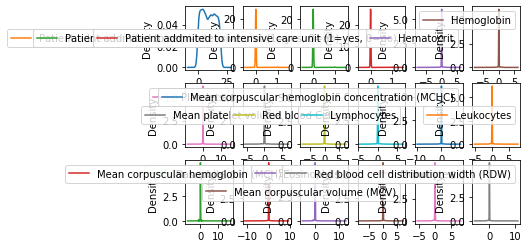

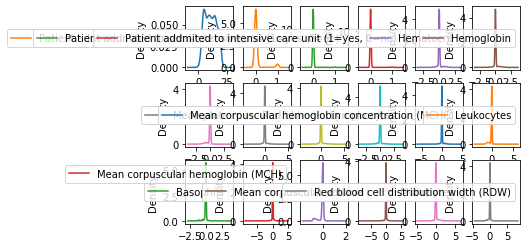

In [38]:
groups = balancedata.groupby("SARS-Cov-2 exam result")
groups.plot(kind='density', subplots=True, layout=(3,6), sharex=False)
plt.show()

0       b'negative'
1       b'negative'
2       b'negative'
3       b'negative'
4       b'negative'
           ...     
6197    b'positive'
6198    b'positive'
6199    b'positive'
6200    b'positive'
6201    b'positive'
Name: SARS-Cov-2 exam result, Length: 6202, dtype: object


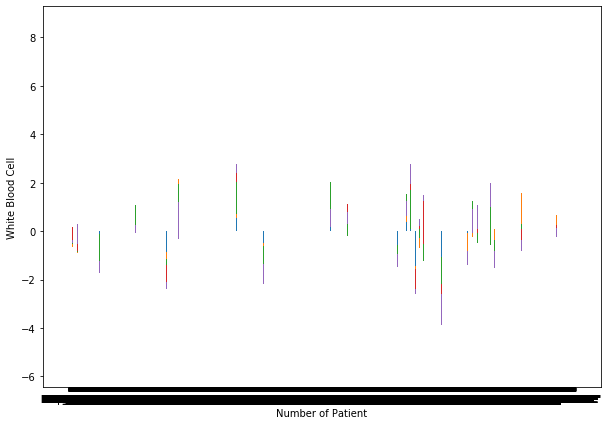

In [123]:
dataset = balancedata[:2][['SARS-Cov-2 exam result','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']]


patient = dataset.iloc[:,0]
Lymphocytes = dataset.iloc[:,1]
Leukocytes = dataset.iloc[:,2]
Basophils = dataset.iloc[:,3]
Eosinophils = dataset.iloc[:,4]
Monocytes = dataset.iloc[:,5]

print(patient)

indx = np.arange(len(dataset))

plt.figure(figsize=(10,7))

graphLymphocytes = plt.bar(x=indx,height=Lymphocytes,width=0.35 , label=name)
#graphLeukocytes = plt.bar(x=indx,height=Leukocytes,width=0.35, bottom=Lymphocytes)
#graphBasophils = plt.bar(x=indx,height=Basophils,width=0.35, bottom=Leukocytes+Lymphocytes)
#graphEosinophils = plt.bar(x=indx,height=Eosinophils,width=0.35,bottom=Basophils+Leukocytes+Lymphocytes)
#graphMonocytes = plt.bar(x=indx,height=Monocytes,width=0.35, bottom=Eosinophils+Basophils+Leukocytes+Lymphocytes)

plt.xlabel('Number of Patient')
plt.ylabel('White Blood Cell')
plt.xticks(indx, patient)
plt.show()

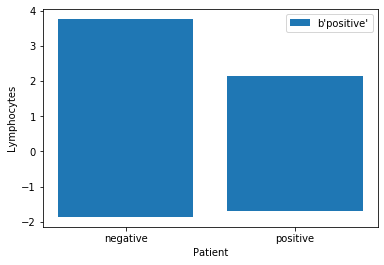

In [124]:
b = plt.bar(balancedata['SARS-Cov-2 exam result'],height=balancedata['Lymphocytes'],width=0.35 , )
c = plt.bar(balancedata['SARS-Cov-2 exam result'],height=balancedata['Leukocytes'],width=0.35 ,bottom=Lymphocytes)
plt.xlabel('Patient')
plt.ylabel('Lymphocytes')
plt.legend()


Text(0, 0.5, 'Lymphocytes')

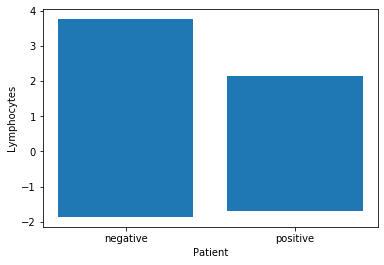

In [113]:
plt.bar(balancedata['SARS-Cov-2 exam result'],balancedata['Lymphocytes'])
plt.xlabel('Patient')
plt.ylabel('Lymphocytes')
#plt.legend()

In [129]:
data_patient = balancedata['SARS-Cov-2 exam result']
LymphocytesBlood = balancedata['Lymphocytes']
LeukocytesBlood = balancedata['Leukocytes']

ypos = np.arange(len(data_patient))

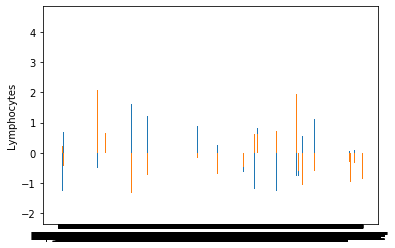

In [132]:
plt.xticks(ypos,data_patient)
plt.ylabel("Lymphocytes")
plt.bar(ypos,LymphocytesBlood)
plt.bar(ypos,LeukocytesBlood)
plt.show()